In [72]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

Y is the actual value which indicates if our specific sweet is chocolate (1) or not (0)
 The remaining columns are used as variables/features to predict our y and, thus, become our X.


In [75]:
df = pd.read_csv("candy-data.csv")
df = df.drop(columns = ['competitorname', 'winpercent'])

X = df.iloc[:, 1:]
y = df.iloc[:, 0][:, np.newaxis]

<ipython-input-75-1286ea92d566>:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = df.iloc[:, 0][:, np.newaxis]


COST FUNCTION

Mean Square Error:  (1/n) * Σ(actual – pred)2 


In [76]:
def compute_cost(X, y, params):
    n = len(y)
    pred = X @ params

    return (1 / (2 * n)) * np.sum((pred - y)**2)

Gradient Descent

iterations — the number of iterations of gradient descent we’ll go through

cost_history — an array that allows us to keep track of our cost history; it’ll help us out when visualizing the algorithm

In [78]:
def gradient_descent(X, y, params, learning_rate, iterations):
    num_samples = len(y)
    cost_history = []

    for i in range(iterations):
        params = params - (learning_rate/num_samples) * X.T @ (X @ params - y) 
        cost_history.append(compute_cost(X, y, params))

    return (cost_history, params)

Normalization is a data preparation technique that simply rescales the values into numbers ranging from 0 to 1. This is done to boost our accuracy while also lowering our cost/error

In [79]:
n = len(y)

mu = np.mean(X, 0)
sigma = np.std(X, 0)

X = (X - mu) / sigma

# add bias term into X to avoid keeping track of it
X = np.hstack((np.ones((n, 1)), X))
n_features = np.size(X, 1)
params = np.zeros((n_features, 1))

Initial cost:  0.21764705882352942 

Optimal parameters are: 
[[ 0.43529399]
 [-0.26827445]
 [-0.03002024]
 [ 0.03246823]
 [-0.01615199]
 [ 0.03059432]
 [-0.01911575]
 [ 0.11609403]
 [-0.00797628]
 [ 0.01947274]
 [ 0.05175128]]

Most important features determined by the algorithm: 
[('fruity', 0.4352939941732927), ('caramel', -0.2682744491689681), ('pluribus', 0.11609403084212999), ('nougat', 0.03246823341229285), ('hard', 0.03059432326508637), ('peanutyalmondy', -0.030020241380320473), ('pricepercent', 0.01947273757036858), ('bar', -0.019115750688101254), ('crispedricewafer', -0.01615199411463213), ('sugarpercent', -0.007976284527551726)]

Final cost:  0.04433152061220413


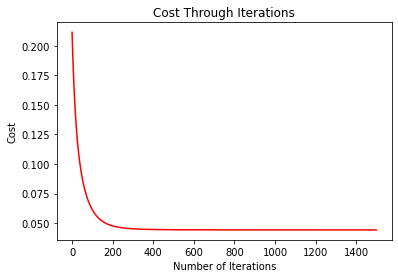

In [80]:
iterations = 1500
learning_rate = 0.01

initial_cost = compute_cost(X, y, params)

print("Initial cost: ", initial_cost, "\n")

(cost_history, optimal_params) = gradient_descent(X, y, params, learning_rate, iterations)

print(f"Optimal parameters are: \n{optimal_params}\n")
print(f"Most important features determined by the algorithm: \n{sorted(zip(list(df)[1:], optimal_params[:, 0]), key = lambda x: -np.abs(x[1]))}\n")

print("Final cost: ", cost_history[-1])

# plot our cost history
plt.plot(range(len(cost_history)), cost_history, 'r')
plt.title("Cost Through Iterations")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.show()